In [697]:
import random
import numpy as np
from deap import creator, base, tools

base.Fitness # 這個東西叫適應性，數字越高表示適應度越好

# 總之我先創造一個適應性方程式叫Fit，我暫時還沒指派任何方程式給他，但我先放著，他屬於base.Fitness這個類別。
# 有點像是 Fit = XX_class()
# 定義權重weights, 我現在設這10個x的權重都一模一樣等於1
# 我後來發現在這個權重不該是定義個體之間，這樣會很奇怪，應該是定義個體的各部位
ind_size = 2 # 定義個體的大小
wt = np.ones(ind_size)
creator.create("Fit", base.Fitness, weights = tuple(wt)) 
# 我想要找到一個x讓 opt_fun最大化，它會是一個浮點數，且我把評估x的適應性交給creator.Fit
# 後來我發現，它是一個"裝"族群的容器，而不是個體
creator.create("container_x", list, fitness = creator.Fit)
# 當我們用function去select結果時，我們可以適應度fit_function的結果配發給，container_x.Fitness
# 然後這個Fitness數據又會順著Fitness = creator.Fit丟到Fit這個類下面，而這個結果會和Fit裡的weights對起來。

# 顯然我會需要一堆GA算法，所以我得把他們包在我的ga_tool裡面
my_ga_tool = base.Toolbox()
# 反正他就是登記一個random.random的method在my_ga_tool裡面，這樣我可以透過my_ga_tool.just_random來呼叫它
# 現在看來有點多此一舉，但就是整合用的。
my_ga_tool.register("just_random", random.random)
# 現在要做出群族

# pop被放在tools.initRepeat下，他們的種族是creator.x, 他們產生方式是my_ga_tool.just_random，數量是n
# 現在重來一次，我做出一個個體just_ind這個個體是一個列表，它被放在contanier_x裡面包起來，
# 個體的每一部份都用my_ga_tool.just_random產生，只有一個部分n = ind_size
my_ga_tool.register("just_ind", tools.initRepeat, creator.container_x, 
                    my_ga_tool.just_random, n = ind_size)
# 現在要定義群體了，順序一樣是命名just_group, 定義類別tools.initRepeat, 定義型態list, 
# 定義群體裏的個體 my_ga_tool.just_ind
my_ga_tool.register("the_group", tools.initRepeat, list, my_ga_tool.just_ind)

# 這是我的適應度方程式，吧。
# 這裡輸入的container是list, 那我輸出也給它list
def opt_fun(ind):
    x = ind[0]
    a = 10*ind[1]
    total = a*x*(1-x)
    return [total]
# 交配方程式
def mate(x1, x2):
    a = (x1[0]+x2[0])/2
    return (a, a)

def big(group):
    return np.sort(group)[-3::]
# 把這些東西登記在我工具箱下面
my_ga_tool.register("mate", tools.cxOnePoint)
my_ga_tool.register("opt", opt_fun)
my_ga_tool.register("select", tools.selTournament, tournsize = 10)

In [699]:
# start GA
def main():
    # 隨機生成初始族群
    pop_init = my_ga_tool.the_group(n = 2000)
    # 評估他們的適應性
    fit_result = map(my_ga_tool.opt, pop_init)
    #[opt_fun(i) for i in pop_init]
    # 用zip函數把fit_result和pop_init打包在一起
    for i, j in zip(pop_init, fit_result):
        i.fitness.values = j
    
    NGEN = 2000
    pop = pop_init
    for g in range(NGEN):
        offspring = my_ga_tool.select(pop, len(pop))
        # 我發現select完之後，the_group的大小沒變，但這時候如果你看向container_x的fitness.values
        # 會發現它的memory address都是指向同一個位置
        # 需要再clone之後，它才會重新分給每個container_x.fitness.values一個新的位址
        offspring = list(map(my_ga_tool.clone, offspring))
        # 交配過程&交配率
        CXPB = 0.2
        for i, j in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                del i.fitness.values
                del j.fitness.values
                i, j = my_ga_tool.mate(i, j)
        # 突變機率
        MUTPB = 0.2
        for i in offspring:
            if random.random() < MUTPB:
                del i.fitness.values
                i = random.random()
        
        fit_offspring = map(my_ga_tool.opt, offspring)
        for i, j in zip(offspring, fit_result):
            i.fitness.values = j
        
        pop[:] = offspring
    return pop

In [700]:
p = main()
for i in p:
    print(i, opt_fun(i))


[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.49415

[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.49415

[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.49415

[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.4941586615147263, 0.9900769475063287] [2.4748545422809163]
[0.49415

2.4943247894555642


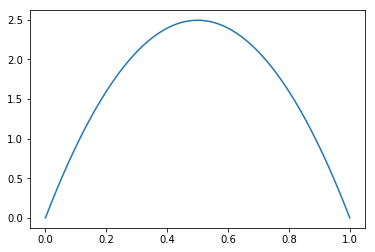

In [688]:
import matplotlib.pyplot as plt
def optfun(x):
    total = 9.977309155116001*x*(1-x)
    return total

x = np.linspace(0,1, 1000)
y = [optfun(i) for i in x]
print(max(y))
plt.plot(x, y)
plt.show()